Importing and opening file 1, bom.movie_gross.csv.gz

In [139]:
import pandas as pd
import csv
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Source 1:

In [136]:

df1 = pd.read_csv("bom.movie_gross.csv.gz", compression = 'gzip')

df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [290]:
df1.year.value_counts()

year
2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: count, dtype: int64

In [138]:
df1.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Source 2: 

In [25]:
df2 = pd.read_csv("tmdb.movies.csv.gz", compression = 'gzip')

df2

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Dropping columns

In [239]:
df2.drop(['id'], axis=1)

,Unnamed: 0,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count,day_of_the_week,month_of_the_year
0,0,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Friday,November
1,1,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Friday,March
2,2,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Friday,May
3,3,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Wednesday,November
4,4,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186,Friday,July
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,Saturday,October
26513,26513,"[18, 53]",en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,Tuesday,May
26514,26514,"[14, 28, 12]",en,The Last One,0.600,2018-10-01,The Last One,0.0,1,Monday,October
26515,26515,"[10751, 12, 28]",en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Friday,June


In [140]:
df4.drop(['dvd_date'], axis=1)
df4.drop(['dvd_date'], axis=1)
df4.drop(['box_office'], axis=1)
df4

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,day_of_the_week,month_of_the_year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Friday,November
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Friday,March
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Friday,May
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Wednesday,November
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Friday,July
...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,Saturday,October
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,Tuesday,May
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,Monday,October
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Friday,June


In [238]:
df2days = df2.set_index('day_of_the_week')
df2days.groupby('original_title').head(20).sort_values(by='popularity', ascending=False)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,month_of_the_year
day_of_the_week,,,,,,,,,,,
Friday,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,April
Friday,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,October
Friday,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,December
Wednesday,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392,December
Friday,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,May
...,...,...,...,...,...,...,...,...,...,...,...
Tuesday,13877,[10749],401741,en,Crème Caramel,0.600,2014-05-20,Crème Caramel,5.0,1,May
Wednesday,13878,[878],401427,en,Elegy,0.600,2014-09-10,Elegy,5.0,1,September
Sunday,13879,[35],399054,en,Jaguar,0.600,2014-09-21,Jaguar,5.0,1,September


Source 3:

In [26]:
df3 = pd.read_csv("tn.movie_budgets.csv.gz", compression = 'gzip')

df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Source 4

In [166]:
df4 = pd.read_csv("rt.movie_info.tsv.gz", sep = '\t', compression = 'gzip')
df4

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [171]:
df4_split = df4['genre'].str.split('|')
df4_split.value_counts()

genre
[Drama]                                                                                        151
[Comedy]                                                                                       110
[Comedy, Drama]                                                                                 80
[Drama, Mystery and Suspense]                                                                   67
[Art House and International, Drama]                                                            62
                                                                                              ... 
[Art House and International, Drama, Sports and Fitness]                                         1
[Comedy, Documentary, Musical and Performing Arts, Special Interest]                             1
[Comedy, Cult Movies, Mystery and Suspense, Science Fiction and Fantasy]                         1
[Action and Adventure, Art House and International, Mystery and Suspense, Special Interest]      1
[Com

Source 5

In [28]:
df5 = pd.read_csv("rt.reviews.tsv.gz", sep = '\t', encoding='ANSI',  compression = 'gzip')

df5

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


Merging source 1 and 3

In [36]:
merged_df1 = pd.merge(df1, df3, left_on='title', right_on='movie', how='inner')
merged_df1.to_csv('merged_files.csv', index=False)
merged_df1

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100"
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,"$13,000,000","$3,703,182","$9,633,111"
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656"


Merging 'merged_df1' with source 4

In [39]:
merged_df2 = pd.merge(merged_df1, df4, on='studio', how='inner')
merged_df2.to_csv('merged_files.csv', index=False)
merged_df2

,title,studio,domestic_gross_x,foreign_gross,year,id_x,release_date,movie,production_budget,domestic_gross_y,...,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime
0,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
1,Due Date,WB,100500000.0,111200000,2010,84,"Nov 5, 2010",Due Date,"$65,000,000","$100,539,043",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
2,Yogi Bear,WB,100200000.0,101300000,2010,62,"Dec 17, 2010",Yogi Bear,"$80,000,000","$100,246,011",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
3,The Book of Eli,WB,94800000.0,62300000,2010,64,"Jan 15, 2010",The Book of Eli,"$80,000,000","$94,835,059",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
4,The Town,WB,92200000.0,61800000,2010,92,"Sep 17, 2010",The Town,"$37,000,000","$92,186,262",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,The Florida Project,A24,5900000.0,NaN,2017,11,"Oct 6, 2017",The Florida Project,"$2,000,000","$5,904,366",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes
1339,Free Fire,A24,1800000.0,NaN,2017,83,"Apr 21, 2017",Free Fire,"$10,000,000","$1,799,322",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes
1340,A Ghost Story,A24,1600000.0,NaN,2017,86,"Jul 7, 2017",A Ghost Story,"$100,000","$1,594,798",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes
1341,Hereditary,A24,44100000.0,35300000,2018,56,"Jun 8, 2018",Hereditary,"$10,000,000","$44,069,456",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes


In [201]:
import string

Cleaning merged_df2

In [211]:
merged_df2['foreign_gross'] = merged_df2['foreign_gross'].str.replace('[^a-zA-]','')
merged_df2


,title,studio,domestic_gross_x,foreign_gross,year,id_x,release_date,movie,production_budget,domestic_gross_y,...,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime
0,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
1,Due Date,WB,100500000.0,111200000,2010,84,"Nov 5, 2010",Due Date,"$65,000,000","$100,539,043",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
2,Yogi Bear,WB,100200000.0,101300000,2010,62,"Dec 17, 2010",Yogi Bear,"$80,000,000","$100,246,011",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
3,The Book of Eli,WB,94800000.0,62300000,2010,64,"Jan 15, 2010",The Book of Eli,"$80,000,000","$94,835,059",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
4,The Town,WB,92200000.0,61800000,2010,92,"Sep 17, 2010",The Town,"$37,000,000","$92,186,262",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,The Florida Project,A24,5900000.0,NaN,2017,11,"Oct 6, 2017",The Florida Project,"$2,000,000","$5,904,366",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes
1339,Free Fire,A24,1800000.0,NaN,2017,83,"Apr 21, 2017",Free Fire,"$10,000,000","$1,799,322",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes
1340,A Ghost Story,A24,1600000.0,NaN,2017,86,"Jul 7, 2017",A Ghost Story,"$100,000","$1,594,798",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes
1341,Hereditary,A24,44100000.0,35300000,2018,56,"Jun 8, 2018",Hereditary,"$10,000,000","$44,069,456",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes


In [242]:
merged_df2['production_budget'] = merged_df2['production_budget'].str.replace('[^a-zA-]','')
merged_df2

,title,studio,domestic_gross_x,foreign_gross,year,id_x,release_date,movie,production_budget,domestic_gross_y,...,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime
0,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
1,Due Date,WB,100500000.0,111200000,2010,84,"Nov 5, 2010",Due Date,"$65,000,000","$100,539,043",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
2,Yogi Bear,WB,100200000.0,101300000,2010,62,"Dec 17, 2010",Yogi Bear,"$80,000,000","$100,246,011",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
3,The Book of Eli,WB,94800000.0,62300000,2010,64,"Jan 15, 2010",The Book of Eli,"$80,000,000","$94,835,059",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
4,The Town,WB,92200000.0,61800000,2010,92,"Sep 17, 2010",The Town,"$37,000,000","$92,186,262",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,The Florida Project,A24,5900000.0,NaN,2017,11,"Oct 6, 2017",The Florida Project,"$2,000,000","$5,904,366",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes
1339,Free Fire,A24,1800000.0,NaN,2017,83,"Apr 21, 2017",Free Fire,"$10,000,000","$1,799,322",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes
1340,A Ghost Story,A24,1600000.0,NaN,2017,86,"Jul 7, 2017",A Ghost Story,"$100,000","$1,594,798",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes
1341,Hereditary,A24,44100000.0,35300000,2018,56,"Jun 8, 2018",Hereditary,"$10,000,000","$44,069,456",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes


In [215]:
merged_df2.drop_duplicates()

,title,studio,domestic_gross_x,foreign_gross,year,id_x,release_date,movie,production_budget,domestic_gross_y,...,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime
0,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
1,Due Date,WB,100500000.0,111200000,2010,84,"Nov 5, 2010",Due Date,"$65,000,000","$100,539,043",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
2,Yogi Bear,WB,100200000.0,101300000,2010,62,"Dec 17, 2010",Yogi Bear,"$80,000,000","$100,246,011",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
3,The Book of Eli,WB,94800000.0,62300000,2010,64,"Jan 15, 2010",The Book of Eli,"$80,000,000","$94,835,059",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
4,The Town,WB,92200000.0,61800000,2010,92,"Sep 17, 2010",The Town,"$37,000,000","$92,186,262",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,The Florida Project,A24,5900000.0,NaN,2017,11,"Oct 6, 2017",The Florida Project,"$2,000,000","$5,904,366",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes
1339,Free Fire,A24,1800000.0,NaN,2017,83,"Apr 21, 2017",Free Fire,"$10,000,000","$1,799,322",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes
1340,A Ghost Story,A24,1600000.0,NaN,2017,86,"Jul 7, 2017",A Ghost Story,"$100,000","$1,594,798",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes
1341,Hereditary,A24,44100000.0,35300000,2018,56,"Jun 8, 2018",Hereditary,"$10,000,000","$44,069,456",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes


Calculating profits

In [241]:
pd.to_numeric(merged_df2['foreign_gross'])

0       535700000.0
1       111200000.0
2       101300000.0
3        62300000.0
4        61800000.0
           ...     
1338            NaN
1339            NaN
1340            NaN
1341     35300000.0
1342            NaN
Name: foreign_gross, Length: 1343, dtype: float64

In [260]:
merged_df2['production_budget'] = [x.strip('$') for x in merged_df2['production_budget']]
merged_df2['production_budget'] = merged_df2.replace(',', '', regex=True, inplace=True)
pd.to_numeric(merged_df2['production_budget'])

AttributeError: 'NoneType' object has no attribute 'strip'

In [216]:
merged_df2.sort_values(by='foreign_gross', ascending=False).head()

,title,studio,domestic_gross_x,foreign_gross,year,id_x,release_date,movie,production_budget,domestic_gross_y,...,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime
219,Creed II,MGM,115700000.0,98300000,2018,96,"Nov 21, 2018",Creed II,"$50,000,000","$115,715,889",...,A comic series of short vignettes build on one...,R,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,Jim Jarmusch,"May 14, 2004","Sep 21, 2004",$,"1,971,135",96 minutes
220,Creed II,MGM,115700000.0,98300000,2018,96,"Nov 21, 2018",Creed II,"$50,000,000","$115,715,889",...,Successful restaurateur Will Keane is on the v...,PG-13,Drama|Romance,Joan Chen,Allison Burnett,"Aug 11, 2000","Nov 14, 2001",NaN,NaN,103 minutes
221,Creed II,MGM,115700000.0,98300000,2018,96,"Nov 21, 2018",Creed II,"$50,000,000","$115,715,889",...,Sylvester Stallone returns to the character wh...,PG,Action and Adventure|Drama,Sylvester Stallone,Sylvester Stallone,"May 28, 1982","Mar 18, 2003",NaN,NaN,99 minutes
222,Creed II,MGM,115700000.0,98300000,2018,96,"Nov 21, 2018",Creed II,"$50,000,000","$115,715,889",...,Curious filmgoers looking to get better acquai...,R,Drama|Horror|Mystery and Suspense,Peter Webber,Thomas Harris,"Feb 9, 2007","May 29, 2007",$,"27,503,677",121 minutes
223,Creed II,MGM,115700000.0,98300000,2018,96,"Nov 21, 2018",Creed II,"$50,000,000","$115,715,889",...,"The year is 1965, and Edie Sedgwick is living ...",R,Drama,George Hickenlooper,Captain Mauzner,"Feb 9, 2007","Jul 17, 2007",$,"1,566,027",89 minutes


Dropping null lines

In [41]:
merged_df2.dropna()

,title,studio,domestic_gross_x,foreign_gross,year,id_x,release_date,movie,production_budget,domestic_gross_y,...,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime
0,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
1,Due Date,WB,100500000.0,111200000,2010,84,"Nov 5, 2010",Due Date,"$65,000,000","$100,539,043",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
2,Yogi Bear,WB,100200000.0,101300000,2010,62,"Dec 17, 2010",Yogi Bear,"$80,000,000","$100,246,011",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
3,The Book of Eli,WB,94800000.0,62300000,2010,64,"Jan 15, 2010",The Book of Eli,"$80,000,000","$94,835,059",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
4,The Town,WB,92200000.0,61800000,2010,92,"Sep 17, 2010",The Town,"$37,000,000","$92,186,262",...,"Directed by Clint Eastwood, the mysterious dra...",R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,"Oct 8, 2003","Jun 8, 2004",$,"88,800,000",137 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,The Witch,A24,25100000.0,15300000,2016,94,"Feb 19, 2016",The Witch,"$3,500,000","$25,138,705",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes
1335,American Honey,A24,663000.0,1200000,2016,15,"Sep 30, 2016",American Honey,"$3,500,000","$663,247",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes
1336,Lady Bird,A24,49000000.0,30000000,2017,53,"Nov 3, 2017",Lady Bird,"$10,000,000","$48,958,273",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes
1337,The Disaster Artist,A24,21100000.0,8700000,2017,100,"Dec 1, 2017",The Disaster Artist,"$10,000,000","$21,120,616",...,Imagine the end of the world. Now imagine some...,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,"Jun 9, 2017","Sep 12, 2017",$,"13,985,117",91 minutes


In [42]:
merged_df1.dropna()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...
1236,Hotel Artemis,Global Road,6700000.0,6000000,2018,15,"Jun 8, 2018",Hotel Artemis,"$15,000,000","$6,708,137","$12,758,799"
1237,Kin,LGF,5700000.0,4300000,2018,88,"Aug 31, 2018",Kin,"$30,000,000","$5,718,096","$10,096,821"
1239,Suspiria,Amazon,2500000.0,5400000,2018,81,"Oct 26, 2018",Suspiria,"$20,000,000","$2,483,472","$7,034,615"
1241,Destroyer,Annapurna,1500000.0,4000000,2018,5,"Dec 25, 2018",Destroyer,"$9,000,000","$1,533,324","$3,681,096"


In [44]:
merged_df1.drop_duplicates()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100"
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,"$13,000,000","$3,703,182","$9,633,111"
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656"


VISUALISATIONS

Business understanding

In [47]:
df1= df1.set_index('studio')
df1

,title,domestic_gross,foreign_gross,year
studio,,,,
BV,Toy Story 3,415000000.0,652000000,2010
BV,Alice in Wonderland (2010),334200000.0,691300000,2010
WB,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
WB,Inception,292600000.0,535700000,2010
P/DW,Shrek Forever After,238700000.0,513900000,2010
...,...,...,...,...
Magn.,The Quake,6200.0,NaN,2018
FM,Edward II (2018 re-release),4800.0,NaN,2018
Sony,El Pacto,2500.0,NaN,2018


In [116]:
studio_count = df1.studio.value_counts().head(20) 
studio_count

studio
IFC       166
Uni.      147
WB        140
Fox       136
Magn.     136
SPC       123
Sony      110
BV        106
LGF       103
Par.      101
Eros       89
Wein.      77
CL         74
Strand     68
FoxS       67
RAtt.      66
KL         62
Focus      60
WGUSA      58
CJ         56
Name: count, dtype: int64

<Axes: ylabel='count'>

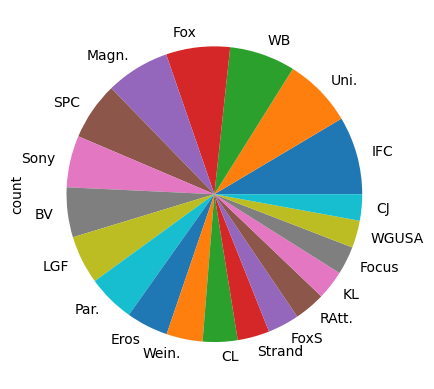

In [117]:
studio_count.plot(kind='pie')

Data analysis

In [141]:
month_count = df2.month_of_the_year.value_counts()
month_count

month_of_the_year
January      3132
October      3035
April        2566
March        2406
November     2338
September    2264
June         2166
December     1929
May          1865
August       1698
February     1614
July         1504
Name: count, dtype: int64

<Axes: xlabel='month_of_the_year'>

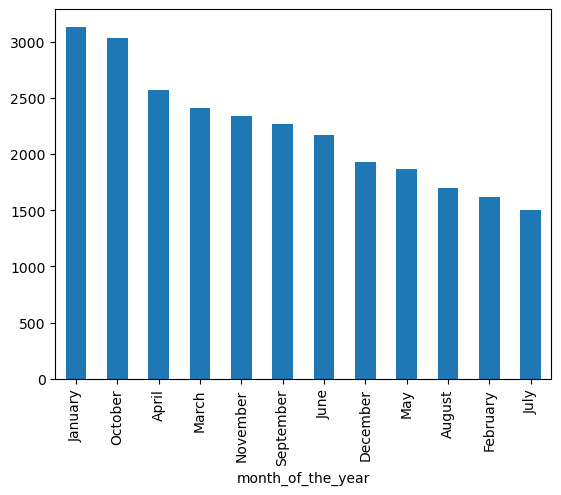

In [142]:
month_count.plot(kind='bar')

In [144]:
days_count = df2.day_of_the_week.value_counts()
days_count

day_of_the_week
Friday       9171
Tuesday      4380
Saturday     3568
Thursday     2651
Sunday       2544
Wednesday    2238
Monday       1965
Name: count, dtype: int64

<Axes: xlabel='day_of_the_week'>

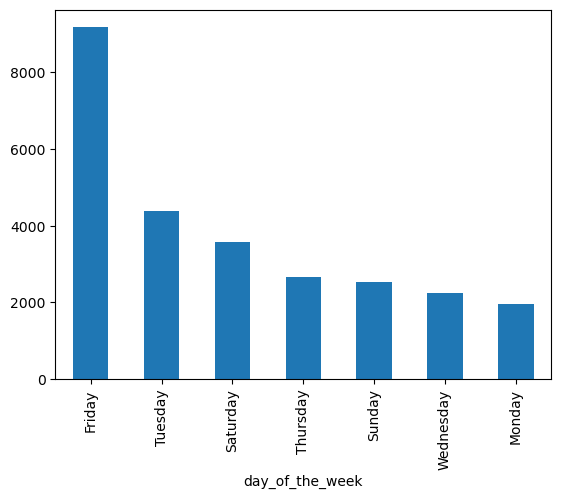

In [146]:
days_count.plot(kind='bar')

In [177]:

genre_countgenre_count = df4.genre.value_counts().head(10)

genre
Drama                                              151
Comedy                                             110
Comedy|Drama                                        80
Drama|Mystery and Suspense                          67
Art House and International|Drama                   62
Action and Adventure|Drama                          42
Action and Adventure|Drama|Mystery and Suspense     40
Drama|Romance                                       35
Comedy|Romance                                      32
Art House and International|Comedy|Drama            31
Name: count, dtype: int64

<Axes: ylabel='count'>

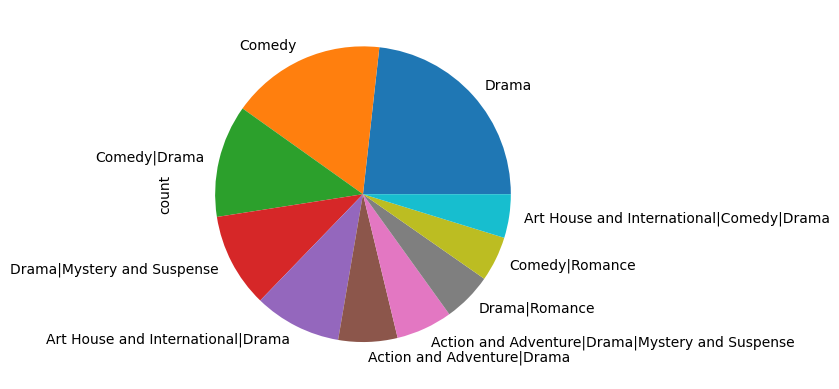

In [267]:
genre_count.plot(kind='pie')

In [278]:
df2['popularity']

0        33.533
1        28.734
2        28.515
3        28.005
4        27.920
          ...  
26512     0.600
26513     0.600
26514     0.600
26515     0.600
26516     0.600
Name: popularity, Length: 26517, dtype: float64

In [288]:
month_popularity = df2.groupby('month_of_the_year')[['popularity']].mean().sort_values('popularity', ascending=False)
month_popularity

,popularity
month_of_the_year,
December,3.922681
July,3.585265
August,3.580677
November,3.459795
February,3.352600
September,3.265490
May,3.123663
October,3.081957
March,3.052933
